<a href="https://colab.research.google.com/github/ua-datalab/GraphML/blob/main/04_22_GraphML_Lecture04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Graph Convolutional Networks (GCNs)**

### **Before we start, change the Runtime to T4**


### In this tutorial, we will explore Graph Convolutional Networks (GCNs), a powerful tool for dealing with data structured as graphs. We'll start with an understanding of convolution in traditional settings, explain how GCNs adapt this to graph data, and discuss the advantages of GCNs over simpler models. Lastly, we'll touch on some applications of GCNs across various fields.

## **What is a Convolution?**

### In traditional signal processing, convolution is a mathematical operation on two functions that produces a third function expressing how the shape of one is modified by the other. In the context of deep learning, especially in convolutional neural networks (CNNs) used for image processing, convolution operates by sliding a filter (kernel) across the image and computing the dot product of the filter with the image regions it covers.

### Mathematical Representation

### For a discrete function \( f \) (e.g., an image) and a filter \( g \), convolution is defined as:

$$
(f * g)[t] = \sum_{\tau=-\infty}^{\infty} f[\tau] \cdot g[t - \tau]
$$


### In CNNs, this operation helps in detecting features such as edges and textures by applying various filters to the input image.


## **What is a Graph Convolutional Network (GCN)?**

### Graphs, consisting of nodes (vertices) and edges (connections), pose a unique challenge for the convolution operation due to their irregular structure. GCNs address this by redefining convolution for graph data.






$$
H^{(l+1)} = \sigma \left( \tilde{D}^{-\frac{1}{2}} \tilde{A} \tilde{D}^{-\frac{1}{2}} H^{(l)} W^{(l)} \right)
$$

where:
- $ \tilde{A} = A + I $ — the adjacency matrix $ A $ with added self-connections $ I $ (identity matrix).
- $ \tilde{D} $ is the degree matrix of $ \tilde{A} $, with $ \tilde{D}_{ii} = \sum_j \tilde{A}_{ij} $.
- $ H^{(l)} $ represents the node features at layer $ l $.
- $ W^{(l)} $ is the weight matrix for layer \( l \).
- $ \sigma $ is a non-linear activation function, such as ReLU.


#### Step-by-Step Breakdown:

1. **Adjacency Matrix with Self-Connections:**
   - $  \tilde{A} = A + I  $
   - Here, $A $ is the original adjacency matrix of the graph, and $ I $ is the identity matrix. Adding $ I $ incorporates self-loops, allowing each node to consider its own features along with its neighbors' features.

2. **Degree Matrix of $ \tilde{A} $:**
   - $ \tilde{D} $ is calculated as the degree matrix of $ \tilde{A} $.
   - $ \tilde{D}_{ii} = \sum_j \tilde{A}_{ij} $
   - This matrix is diagonal, where each entry $ \tilde{D}_{ii} $ is the sum of the weights of all edges connected to node $ i $, including the self-loop.

3. **Normalized Adjacency Matrix:**
   - The term $ \tilde{D}^{-\frac{1}{2}} \tilde{A} \tilde{D}^{-\frac{1}{2}} $ represents the normalization of $ \tilde{A} $ by $ \tilde{D} $.
   - This normalization balances the influence of high-degree and low-degree nodes, making the model less sensitive to variations in node degree.

4. **Feature Matrix at Layer $ l $:**
   - $ H^{(l)} $
   - Represents the matrix of node features at the $ l $-th layer. Each row corresponds to a node's features.

5. **Weight Matrix for Layer $ l $:**
   - $ W^{(l)} $
   - This is a learnable parameter matrix that transforms node features from one layer to the next.

6. **Activation Function:**
   - $ \sigma $
   - A non-linear activation function like ReLU (Rectified Linear Unit). This function is applied element-wise to the result of the matrix multiplication, introducing non-linearity into the model, which helps the network learn complex patterns.



### **How It All Comes Together:**

- The normalized adjacency matrix $ \tilde{D}^{-\frac{1}{2}} \tilde{A} \tilde{D}^{-\frac{1}{2}} $ multiplies the feature matrix $ H^{(l)} $, effectively aggregating and normalizing the features from each node’s neighbors.
- The result is then multiplied by the weight matrix $ W^{(l)} $, which transforms the features into a new feature space.
- Finally, the activation function $ \sigma $ is applied to introduce non-linearity and to generate the output $ H^{(l+1)} $, which serves as the input for the next layer or as the final output of the network if it is the last layer.


### **GCN vs. Vanilla Graph Neural Networks ( as given in Tutorial 3)**
---


Recollect that for **Vanilla Graph Networks** we have,

Given a graph with adjacency matrix $ \tilde{A} $, feature matrix $ X $, and weight matrix $ W $, the updated feature matrix $ H $ can be calculated using the formula:

$$
H = \sigma \left( \tilde{A}^{\top} X W^{\top} \right)
$$


---


### Now for GCNs,we have

$$
H = \sigma \left( \tilde{D}^{-1} \tilde{A} X W^{\top} \right)
$$

This formula implies that each node's feature vector is first spread across its neighbors according to $A$, then scaled down by the inverse of its degree, effectively normalizing the contribution of each node by its degree.

### This prevents nodes with high degrees from dominating the feature aggregation process.

### **Normalized Form Using $ \tilde{D}^{-\frac{1}{2}}$**



### The normalization approach introduced by [Kipf and Welling](https://arxiv.org/abs/1609.02907) enhances the above formulation by applying a symmetric normalization using the square roots of $\tilde{D}$.

#### This method helps in maintaining a balanced scale of feature propagation. Hence the feature transformation matrix becomes

$$
\tilde{D}^{-\frac{1}{2}} \tilde{A} \tilde{D}^{-\frac{1}{2}} X W^{\top}
$$


#### The product $\tilde{D}^{-\frac{1}{2}} \tilde{A} \tilde{D}^{-\frac{1}{2}}$ results in a symmetrically normalized adjacency matrix that ensures the magnitude of feature vectors remains consistent across the graph, thus avoiding numerical instabilities and improving the learning dynamics.

So, generalized expression of a GCN layer becomes,


$$
H^{(l+1)} = \sigma \left( \tilde{D}^{-\frac{1}{2}} \tilde{A} \tilde{D}^{-\frac{1}{2}} H^{(l)} W^{(l)} \right)
$$

## GCNs improve upon vanilla graph neural networks in several ways:

- **Normalization**: GCNs use the symmetric normalization $ \tilde{D}^{-\frac{1}{2}} \tilde{A} \tilde{D}^{-\frac{1}{2}} $ which scales the feature aggregation by the degrees of the nodes, preventing high-degree nodes from dominating due to their larger number of connections.
- **Self-connections**: The addition of the identity matrix $ I $ to $ A $ allows each node to consider its own features alongside its neighbors', helping preserve each node's original features through layers.
- **Trainable Transformations**: The weight matrix $ W^{(l)} $ in GCNs is trainable, allowing the network to learn optimal feature transformations through backpropagation.

## Applications of Graph Convolutional Networks

GCNs find applications in various domains, such as:

- **Social Network Analysis**: Detecting communities, predicting interactions, and understanding network dynamics.
- **Recommendation Systems**: Enhancing recommendations by learning complex user-item relationships embedded in the network.
- **Molecular Chemistry**: Predicting molecular properties by modeling molecular structures as graphs.
- **Computer Vision**: Managing tasks involving non-grid data like point clouds or mesh structures.

### Even though the mechanism of standard convolution operation differs, the fundamental principles of convolution hold -

*   Local Information Processing,
*   Feature extraction
*   Use of shared learnable filters

### Therefore, the term "convolution" is used metaphorically to describe these operations in GCNs.

### It highlights the network's ability to perform similar tasks as CNNs but adapted for data that inherently lacks a Euclidean structure, instead possessing complex relational and topological structures.

### **Let's understand by examples**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Example

### Considering the following adjacency matrix $ A $

In [2]:
A = np.array([
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0]])

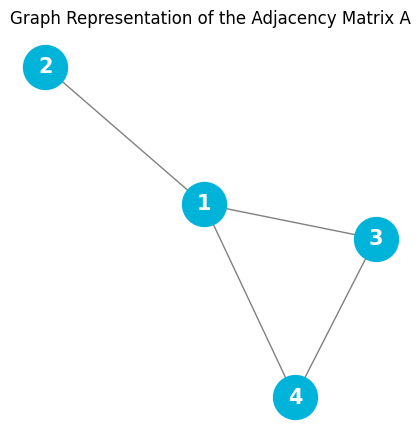

In [3]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(A)
mapping = {i: i + 1 for i in range(len(G.nodes))}
G = nx.relabel_nodes(G, mapping)

# Draw the graph with labels starting from 1
plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, font_color='#ffffff', node_size=1000, node_color="#00b4d9", font_size=15, font_weight='bold', edge_color='gray')
plt.title("Graph Representation of the Adjacency Matrix A")
plt.show()

### **Degree matrix** $ D $




In [4]:
D = np.diag(np.sum(A, axis=1))
D

array([[3, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 2]])

### **Inverse of D:**
 $ {D}^{-1} $

In [5]:
invD = np.linalg.inv(D)
invD

array([[0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ]])

### **adding self loops to adjacency matrix**:  $ \tilde{A}  = A + I$

In [6]:
Adash = A + np.identity(4)

In [7]:
Adash

array([[1., 1., 1., 1.],
       [1., 1., 0., 0.],
       [1., 0., 1., 1.],
       [1., 0., 1., 1.]])

### **New Degree Matrix - considering self loops:** $ \tilde{D} $


In [8]:
Ddash = np.diag(np.sum(Adash, axis=1))

In [9]:
Ddash

array([[4., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 3., 0.],
       [0., 0., 0., 3.]])

### Inverse of the new D matrix:   $ \tilde{D}^{-1} $

In [10]:
invDdash = np.linalg.inv(Ddash)

In [11]:
invDdash

array([[0.25      , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 0.33333333]])

### **$\tilde{D}^{-1} \tilde{A}$**

In [12]:
dinv_x_A = np.multiply(invDdash, Adash)
dinv_x_A

array([[0.25      , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 0.33333333]])

### **Working out examples from previous Tutorials**

In [13]:
!pip install -q torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.4 MB/s eta 0:00:00


In [14]:
from torch_geometric.datasets import Planetoid,FacebookPagePage
from torch_geometric.utils import degree
from collections import Counter
import matplotlib.pyplot as plt

### **The Cora Dataset**

In [15]:
# Import dataset from PyTorch Geometric
dataset = Planetoid(root=".", name="Cora")
data = dataset[0]
degrees = degree(data.edge_index[0]).numpy()


Processing...
Done!


In [16]:
# degrees
numbers = Counter(degrees)

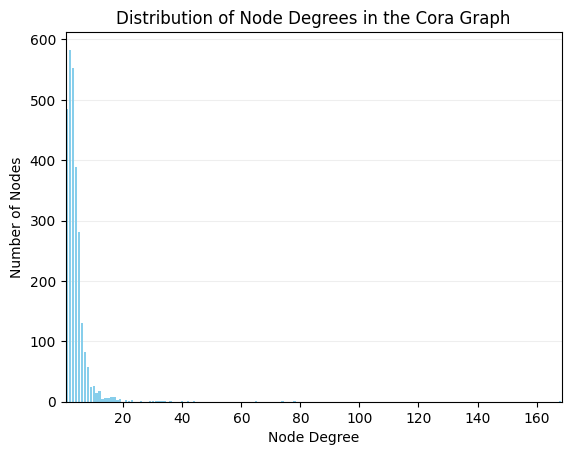

In [17]:
fig, ax = plt.subplots()
ax.set_xlabel('Node Degree')
ax.set_ylabel('Number of Nodes')
ax.set_title('Distribution of Node Degrees in the Cora Graph')  # Adding a title

# Creating the bar plot
bars = ax.bar(numbers.keys(), numbers.values(), color='skyblue')  # Color the bars

# Adding grid for better readability
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Optionally, add a gentle x-axis limit extension
ax.set_xlim(min(numbers.keys()) - 0.5, max(numbers.keys()) + 0.5)

# Optionally, add labels on top of each bar
for bar in bars:
    yval = bar.get_height()

plt.show()


### This distribution appears to be exponential with a heavy tail: it spans from 1 neighbor (485 nodes) to 168 neighbors (just 1 node)! Such a dataset is a prime example for a degree normalization process to address this imbalance.

---

### Pytorch Geometric Graph Convolutional Network: on the Cora dataset

In [18]:
import torch
import torch.nn.functional as F

from torch_geometric.nn import GCNConv

In [19]:
def accuracy(pred_y, y):
    return ((pred_y == y).sum() / len(y)).item()

In [20]:
class GCN(torch.nn.Module):
    """GCN"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.gcn1(x,edge_index)
        h = torch.relu(h)
        h = self.gcn2(h, edge_index)

        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | 'f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [21]:
# Create the Vanilla GNN model on Cora
gcn = GCN(dataset.num_features, 16, dataset.num_classes)
print(gcn)

GCN(
  (gcn1): GCNConv(1433, 16)
  (gcn2): GCNConv(16, 7)
)


In [22]:
# Train
gcn.fit(data, epochs=100)

Epoch   0 | Train Loss: 1.948 | Train Acc: 15.00% | Val Loss: 1.95 | Val Acc: 15.60%
Epoch  20 | Train Loss: 0.108 | Train Acc: 100.00% | Val Loss: 0.78 | Val Acc: 77.40%
Epoch  40 | Train Loss: 0.016 | Train Acc: 100.00% | Val Loss: 0.77 | Val Acc: 77.80%
Epoch  60 | Train Loss: 0.016 | Train Acc: 100.00% | Val Loss: 0.76 | Val Acc: 77.60%
Epoch  80 | Train Loss: 0.018 | Train Acc: 100.00% | Val Loss: 0.75 | Val Acc: 78.00%
Epoch 100 | Train Loss: 0.016 | Train Acc: 100.00% | Val Loss: 0.75 | Val Acc: 77.80%


In [23]:
# Test
acc = gcn.test(data)
print(f'\nGCN test accuracy on Cora Dataset: {acc*100:.2f}%\n')


GCN test accuracy on Cora Dataset: 80.40%



## **The FB Page-Page dataset**

In [24]:
# Import dataset from PyTorch Geometric
dataset = FacebookPagePage(root=".")
data = dataset[0]

# Create masks
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)


Processing...
Done!


In [25]:
# Get list of degrees for each node
degrees = degree(data.edge_index[0]).numpy()

# Count the number of nodes for each degree
numbers = Counter(degrees)

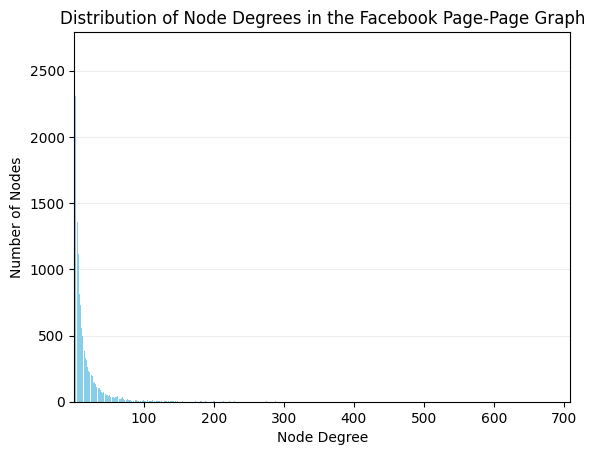

In [26]:
fig, ax = plt.subplots()
ax.set_xlabel('Node Degree')
ax.set_ylabel('Number of Nodes')
ax.set_title('Distribution of Node Degrees in the Facebook Page-Page Graph')  # Adding a title

# Creating the bar plot
bars = ax.bar(numbers.keys(), numbers.values(), color='skyblue')  # Color the bars

# Adding grid for better readability
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Optionally, add a gentle x-axis limit extension
ax.set_xlim(min(numbers.keys()) - 0.5, max(numbers.keys()) + 0.5)

# Optionally, add labels on top of each bar
for bar in bars:
    yval = bar.get_height()

plt.show()


### The distribution of node degrees is notably skewed, ranging from 1 to 709 neighbors. For this reason, the Facebook Page-Page dataset presents an exciting case to apply a Graph Convolutional Network (GCN).

In [27]:
gcn = GCN(dataset.num_features, 16, dataset.num_classes)
print(gcn)

GCN(
  (gcn1): GCNConv(128, 16)
  (gcn2): GCNConv(16, 4)
)


In [28]:
# Train
gcn.fit(data, epochs=100)



Epoch   0 | Train Loss: 1.504 | Train Acc: 21.83% | Val Loss: 1.50 | Val Acc: 21.31%
Epoch  20 | Train Loss: 0.447 | Train Acc: 84.36% | Val Loss: 0.45 | Val Acc: 85.04%
Epoch  40 | Train Loss: 0.319 | Train Acc: 89.50% | Val Loss: 0.32 | Val Acc: 89.39%
Epoch  60 | Train Loss: 0.279 | Train Acc: 91.13% | Val Loss: 0.28 | Val Acc: 91.35%
Epoch  80 | Train Loss: 0.258 | Train Acc: 92.08% | Val Loss: 0.26 | Val Acc: 92.00%
Epoch 100 | Train Loss: 0.243 | Train Acc: 92.68% | Val Loss: 0.25 | Val Acc: 92.45%


In [29]:
# Test
acc = gcn.test(data)
print(f'\nGCN test accuracy on Facebook Page-Page Dataset: {acc*100:.2f}%\n')


GCN test accuracy on Facebook Page-Page Dataset: 91.54%



## Comparing MLP, Vanilla GNN and GCN

| Dataset  | MLP             | Vanilla GNN              | GCN |
|:----------:|:-----------------:|:------------------:| :-------------: |
| Cora     | 53.40% | 75.00%  |80.60 % |
| Facebook Page-Page | 75.13% | 82.67%  | 91.21%|



---



---



# GCN on the CiteSeer and Pubmed dataset from Tutorial 3

In [30]:
dataset_CSeer = Planetoid(root=".", name="CiteSeer")
data_graph_CSeer = dataset_CSeer[0] # get the citeseer graph

dataset_PM = Planetoid(root=".", name="PubMed")
data_graph_PM = dataset_PM[0] # the Pubmed graph

Processing...
Done!
Processing...
Done!


## **GCN on Citeseer**

In [31]:
gcn = GCN(dataset_CSeer.num_features, 16, dataset_CSeer.num_classes)
print(gcn)

GCN(
  (gcn1): GCNConv(3703, 16)
  (gcn2): GCNConv(16, 6)
)


In [32]:
# Train
gcn.fit(data_graph_CSeer, epochs=100)

Epoch   0 | Train Loss: 1.795 | Train Acc: 18.33% | Val Loss: 1.80 | Val Acc: 16.60%
Epoch  20 | Train Loss: 0.026 | Train Acc: 100.00% | Val Loss: 1.13 | Val Acc: 63.60%
Epoch  40 | Train Loss: 0.009 | Train Acc: 100.00% | Val Loss: 1.10 | Val Acc: 66.20%
Epoch  60 | Train Loss: 0.013 | Train Acc: 100.00% | Val Loss: 1.05 | Val Acc: 67.60%
Epoch  80 | Train Loss: 0.013 | Train Acc: 100.00% | Val Loss: 1.04 | Val Acc: 66.60%
Epoch 100 | Train Loss: 0.012 | Train Acc: 100.00% | Val Loss: 1.03 | Val Acc: 68.20%


In [33]:
# Test
acc = gcn.test(data_graph_CSeer)
print(f'\nGCN test accuracy on CiteSeer Dataset: {acc*100:.2f}%\n')


GCN test accuracy on CiteSeer Dataset: 67.90%



## **GCN on Pubmed**

In [34]:
gcn = GCN(dataset_PM.num_features, 16, dataset_PM.num_classes)
print(gcn)

GCN(
  (gcn1): GCNConv(500, 16)
  (gcn2): GCNConv(16, 3)
)


In [35]:
# Train
gcn.fit(data_graph_PM, epochs=100)

Epoch   0 | Train Loss: 1.098 | Train Acc: 40.00% | Val Loss: 1.10 | Val Acc: 38.60%
Epoch  20 | Train Loss: 0.631 | Train Acc: 95.00% | Val Loss: 0.83 | Val Acc: 75.60%
Epoch  40 | Train Loss: 0.249 | Train Acc: 98.33% | Val Loss: 0.62 | Val Acc: 76.80%
Epoch  60 | Train Loss: 0.131 | Train Acc: 100.00% | Val Loss: 0.58 | Val Acc: 77.40%
Epoch  80 | Train Loss: 0.099 | Train Acc: 100.00% | Val Loss: 0.57 | Val Acc: 78.20%
Epoch 100 | Train Loss: 0.082 | Train Acc: 100.00% | Val Loss: 0.56 | Val Acc: 78.40%


In [36]:
# Test
acc = gcn.test(data_graph_PM)
print(f'\nGCN test accuracy on PubMed Dataset: {acc*100:.2f}%\n')


GCN test accuracy on PubMed Dataset: 78.90%



In [190]:
# @title Model Comparison
%%html
<table style="width:70%; margin-left:auto; margin-right:auto;" border="1">
  <tr style="background-color: #f2f2f2;">
    <th style="padding: 10px; text-align:center;">Dataset</th>
    <th style="padding: 10px; text-align:center;">MLP (Tutorial 3)</th>
    <th style="padding: 10px; text-align:center;">Vanilla GNN (Tutorial 3)</th>
    <th style="padding: 10px; text-align:center;">GCN </th>
  </tr>
  <tr>
    <td style="padding: 10px; text-align:center;">Cora</td>
    <td style="padding: 10px; text-align:center;">53.40%</td>
    <td style="padding: 10px; text-align:center;">75.00%</td>
    <td style="padding: 10px; text-align:center;">80.60%</td>
  </tr>
  <tr style="background-color: #f9f9f9;">
    <td style="padding: 10px; text-align:center;">Facebook Page-Page</td>
    <td style="padding: 10px; text-align:center;">75.13%</td>
    <td style="padding: 10px; text-align:center;">82.67%</td>
    <td style="padding: 10px; text-align:center;">91.21%</td>
  </tr>
  <tr>
    <td style="padding: 10px; text-align:center;">CiteSeer</td>
    <td style="padding: 10px; text-align:center;">52.70%</td>
    <td style="padding: 10px; text-align:center;">65.50%</td>
    <td style="padding: 10px; text-align:center;">68.10%</td>
  </tr>
  <tr style="background-color: #f9f9f9;">
    <td style="padding: 10px; text-align:center;">PubMed</td>
    <td style="padding: 10px; text-align:center;">71.90%</td>
    <td style="padding: 10px; text-align:center;">76.50%</td>
    <td style="padding: 10px; text-align:center;">79.10%</td>
  </tr>
</table>


Dataset,MLP (Tutorial 3),Vanilla GNN (Tutorial 3),GCN
Cora,53.40%,75.00%,80.60%
Facebook Page-Page,75.13%,82.67%,91.21%
CiteSeer,52.70%,65.50%,68.10%
PubMed,71.90%,76.50%,79.10%


---
---


# **Node Regression**

In [38]:
from torch_geometric.datasets import WikipediaNetwork
import torch_geometric.transforms as T

### **Wikipedia Chameleon Dataset** - **Predicting web traffic with node regression**

### We will be utilizing the [Wikipedia Network dataset](https://arxiv.org/abs/1909.13021) which comprises three page-page networks: Chameleons, Crocodiles, and Squirrels. Specifically, the Chameleons network has 2,277 nodes and 31,421 edges, the Crocodiles network contains 11,631 nodes and 170,918 edges, and the Squirrels network includes 5,201 nodes and 198,493 edges.

### In these networks, each node represents an article and the edges denote mutual links between these articles. The features of each node indicate the presence of specific words within the articles. The primary objective of using this dataset is to predict the logarithmic average of the monthly traffic for December 2018.

In [157]:
dataset = WikipediaNetwork(root=".", name="chameleon", transform = T.RandomNodeSplit(num_val=200, num_test=500))

In [158]:
data = dataset[0]

In [159]:
# Print information about the dataset
print(f'Dataset: {dataset}')
print('-------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of unique features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Dataset: WikipediaNetwork()
-------------------
Number of graphs: 1
Number of nodes: 2277
Number of unique features: 2325
Number of classes: 5

Graph:
------
Edges are directed: True
Graph has isolated nodes: False
Graph has loops: True


### We have encountered an issue with our dataset: it indicates that there are five classes, but our objective is to perform node regression, not classification. Upon closer examination, it turns out that these "classes" actually represent bins into which continuous values, that we aim to predict, have been grouped.

## Get regression values

In [160]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

url = 'https://snap.stanford.edu/data/wikipedia.zip'
with urlopen(url) as zurl:
    with ZipFile(BytesIO(zurl.read())) as zfile:
        zfile.extractall('.')

In [161]:
import pandas as pd
import torch
df = pd.read_csv('/content/wikipedia/chameleon/musae_chameleon_target.csv')
values = np.log10(df['target'])
data.y = torch.tensor(values)
data.y

tensor([2.2330, 3.9079, 3.9329,  ..., 1.9956, 4.3598, 2.4409],
       dtype=torch.float64)

In [162]:
# Get list of degrees for each node
degrees = degree(data.edge_index[0]).numpy()

# Count the number of nodes for each degree
numbers = Counter(degrees)

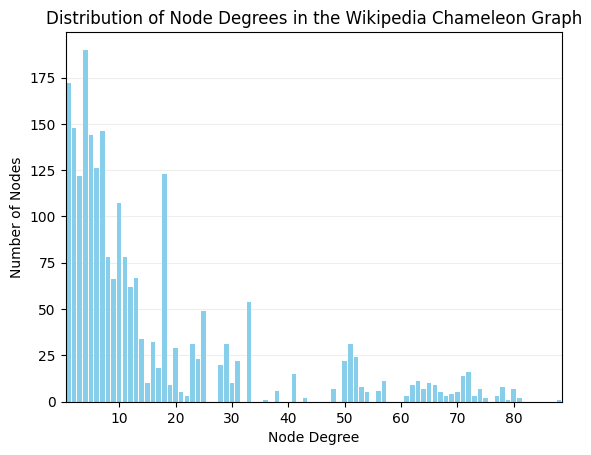

In [45]:
fig, ax = plt.subplots()
ax.set_xlabel('Node Degree')
ax.set_ylabel('Number of Nodes')
ax.set_title('Distribution of Node Degrees in the Wikipedia Chameleon Graph')  # Adding a title

# Creating the bar plot
bars = ax.bar(numbers.keys(), numbers.values(), color='skyblue')  # Color the bars

# Adding grid for better readability
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Optionally, add a gentle x-axis limit extension
ax.set_xlim(min(numbers.keys()) - 0.5, max(numbers.keys()) + 0.5)

# Optionally, add labels on top of each bar
for bar in bars:
    yval = bar.get_height()

plt.show()

## **Distribution of our Regression Variable**


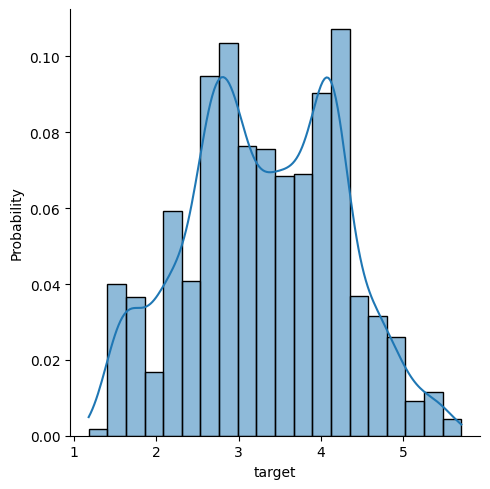

In [46]:
import seaborn as sns
from scipy.stats import norm
df['target'] = values
sns.displot(df['target'], bins=20, kde=True,stat="probability",)
plt.show()

### **MLP for node regression**

In [163]:
import torch
from torch.nn import Linear, Module
import torch.nn.functional as F

class MLP(Module):

    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.linear1 = Linear(dim_in, dim_h)
        self.linear2 = Linear(dim_h, dim_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        return x  # No activation function for regression

    def fit(self, data, epochs):
        criterion = torch.nn.MSELoss()  # Change loss function to MSE
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)
        self.train()

        for epoch in range(epochs + 1):
            optimizer.zero_grad()
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])

            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Val Loss: {val_loss:.2f}')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x)
        test_loss = torch.nn.functional.mse_loss(out[data.test_mask], data.y[data.test_mask])
        return test_loss


In [164]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    device = torch.device("cpu")
    print("CUDA not available. Using CPU.")

CUDA is available. Using GPU.


In [165]:
# Assuming 'data' is an object or dictionary containing 'x', 'y', and masks
data.x = data.x.to(device)
data.y = data.y.to(device)
data.train_mask = data.train_mask.to(device)
data.val_mask = data.val_mask.to(device)

In [167]:
data.y = data.y.to(torch.float32).flatten().unsqueeze(1)

In [168]:
data.y.shape

torch.Size([2277, 1])

### **Create the Vanilla MLP regression model**

In [169]:
mlp = MLP(dataset.num_features, 128, 1).to(device)
print(mlp)

MLP(
  (linear1): Linear(in_features=2325, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=1, bias=True)
)


In [170]:
# Train
mlp.fit(data, epochs=200)

Epoch   0 | Train Loss: 11.471 | Val Loss: 11.13
Epoch  20 | Train Loss: 1.037 | Val Loss: 1.55
Epoch  40 | Train Loss: 0.259 | Val Loss: 1.03
Epoch  60 | Train Loss: 0.115 | Val Loss: 0.83
Epoch  80 | Train Loss: 0.088 | Val Loss: 0.75
Epoch 100 | Train Loss: 0.077 | Val Loss: 0.76
Epoch 120 | Train Loss: 0.069 | Val Loss: 0.79
Epoch 140 | Train Loss: 0.063 | Val Loss: 0.80
Epoch 160 | Train Loss: 0.059 | Val Loss: 0.81
Epoch 180 | Train Loss: 0.057 | Val Loss: 0.83
Epoch 200 | Train Loss: 0.055 | Val Loss: 0.81


In [171]:
# Test
loss = mlp.test(data)
print(f'\nMLP test loss on Wikipedia Chameleon dataset: {loss:.5f}\n')


MLP test loss on Wikipedia Chameleon dataset: 1.02798



### **Sklearn metrics**

In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [173]:
out = mlp(data.x)

In [174]:
y_pred = out.cpu().squeeze()[data.test_mask.cpu()].detach().numpy()


In [175]:
mse = mean_squared_error(data.y[data.test_mask].squeeze().cpu(), y_pred)
mae = mean_absolute_error(data.y[data.test_mask].squeeze().cpu(), y_pred)


In [176]:

print('=' * 13 + '  MLP on Wikipedia Chameleon Dataset ' + '=' * 13)
print(f'MSE = {mse:.4f} | RMSE = {np.sqrt(mse):.4f} | MAE = {mae:.4f}')
print('=' * 57)

=============  MLP on Wikipedia Chameleon Dataset =============
MSE = 1.0280 | RMSE = 1.0139 | MAE = 0.7373


### **GCN on Wikipedia Chamelon Dataset**

In [177]:
from torch_geometric.nn import GCNConv

In [178]:
class GCN(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h*4)
        self.gcn2 = GCNConv(dim_h*4, dim_h*2)
        self.gcn3 = GCNConv(dim_h*2, dim_h)
        self.linear = torch.nn.Linear(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index)
        h = torch.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.gcn2(h, edge_index)
        h = torch.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.gcn3(h, edge_index)
        h = torch.relu(h)
        h = self.linear(h)
        return h

    def fit(self, data, epochs):
        optimizer = torch.optim.Adam(self.parameters(),lr=0.02,weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = F.mse_loss(out.squeeze()[data.train_mask], data.y[data.train_mask].float())
            loss.backward()
            optimizer.step()
            if epoch % 20 == 0:
                val_loss = F.mse_loss(out.squeeze()[data.val_mask], data.y[data.val_mask])
                print(f"Epoch {epoch:>3} | Train Loss: {loss:.5f} | Val Loss: {val_loss:.5f}")

    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        return F.mse_loss(out.squeeze()[data.test_mask], data.y[data.test_mask].float())

In [179]:
data.y.shape

torch.Size([2277, 1])

In [180]:
data.y = data.y.to(torch.float32).flatten()

In [181]:
# Create the Vanilla GNN model
gcn = GCN(dataset.num_features, 1024, 1).to(device)
print(gcn)



GCN(
  (gcn1): GCNConv(2325, 4096)
  (gcn2): GCNConv(4096, 2048)
  (gcn3): GCNConv(2048, 1024)
  (linear): Linear(in_features=1024, out_features=1, bias=True)
)


In [182]:
data = data.to(device)

In [183]:
# Train
gcn.fit(data, epochs=200)



Epoch   0 | Train Loss: 11.62447 | Val Loss: 11.29704
Epoch  20 | Train Loss: 12.44890 | Val Loss: 12.10543
Epoch  40 | Train Loss: 12.53433 | Val Loss: 12.18985
Epoch  60 | Train Loss: 5.70775 | Val Loss: 5.63519
Epoch  80 | Train Loss: 0.76001 | Val Loss: 0.77969
Epoch 100 | Train Loss: 0.44456 | Val Loss: 0.61861
Epoch 120 | Train Loss: 0.39790 | Val Loss: 0.65277
Epoch 140 | Train Loss: 0.30105 | Val Loss: 0.69059
Epoch 160 | Train Loss: 0.30744 | Val Loss: 0.60631
Epoch 180 | Train Loss: 0.31705 | Val Loss: 0.57054
Epoch 200 | Train Loss: 0.27112 | Val Loss: 0.55806


In [184]:
# Test
loss = gcn.test(data)
print(f'\nGCN test loss: {loss:.5f}\n')


GCN test loss: 0.59467



In [185]:

out = gcn(data.x, data.edge_index)

In [186]:
out = out.cpu()

In [187]:
y_pred = out.squeeze()[data.test_mask.cpu()].detach().numpy()


In [188]:
mse = mean_squared_error(data.y[data.test_mask].squeeze().cpu(), y_pred)
mae = mean_absolute_error(data.y[data.test_mask].squeeze().cpu(), y_pred)

In [189]:

print('=' * 13 + '  GCN Wikipedia Chameleon Dataset  ' + '=' * 13)
print(f'MSE = {mse:.4f} | RMSE = {np.sqrt(mse):.4f} | MAE = {mae:.4f}')
print('=' * 57)

=============  GCN Squirrel Chameleon Dataset  =============
MSE = 0.5947 | RMSE = 0.7711 | MAE = 0.6059


### **Comparison**


| Model & Dataset                          | MSE  ⬇  | RMSE  ⬇ | MAE  ⬇  |
|------------------------------------------|--------|--------|--------|
| **MLP** on Wikipedia Chameleon Dataset       | 1.0280 | 1.0139 | 0.7373 |
| **GCN** on Wikipedia Chameleon Dataset        | 0.5947 | 0.7711 | 0.6059 |

Thank you!